<a href="https://colab.research.google.com/github/uvaana/ML-Future-Stock-Prediction/blob/main/visualization_using_matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))


EW-MAX.csv



In csv file, historical price records are in an ascending order of Date. Read the file and reverse the order of records. 

In [ ]:
hist = pd.read_csv(filepath_or_buffer="../input/EW-MAX.csv",delim_whitespace=False,header=0,sep=',')
hist['Date'] = pd.to_datetime(hist['Date'])
#find day of week and convert the day into dummy features 5->101, 4->100...
hist['DayofWeek'] = hist['Date'].dt.dayofweek  # Day of week 0...4
hist['Dayofweek_Dummy0'] = hist.apply(lambda row: row['DayofWeek'] == 0 and 1 or 0, axis =1)
hist['Dayofweek_Dummy1'] = hist.apply(lambda row: row['DayofWeek'] == 1 and 1 or 0, axis =1)
hist['Dayofweek_Dummy2'] = hist.apply(lambda row: row['DayofWeek'] == 2 and 1 or 0, axis =1)
hist['Dayofweek_Dummy3'] = hist.apply(lambda row: row['DayofWeek'] == 3 and 1 or 0, axis =1)
hist['Dayofweek_Dummy4'] = hist.apply(lambda row: row['DayofWeek'] == 4 and 1 or 0, axis =1)




check some basic information

In [ ]:
hist.describe()

,Open,High,Low,Close,Adj_Close,Volume,DayofWeek,Dayofweek_Dummy0,Dayofweek_Dummy1,Dayofweek_Dummy2,Dayofweek_Dummy3,Dayofweek_Dummy4
count,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000,4392.000000
mean,30.562539,30.893618,30.238833,30.572580,30.572580,1.884027e+06,2.021858,0.187842,0.204690,0.205601,0.201503,0.200364
std,29.914758,30.210974,29.615761,29.905778,29.905778,1.621609e+06,1.399637,0.390630,0.403521,0.404186,0.401168,0.400319
min,3.296875,3.390625,3.000000,3.250000,3.250000,1.904000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.718125,8.803125,8.625000,8.712500,8.712500,1.088800e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.766250,14.981250,14.662500,14.767500,14.767500,1.539300e+06,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.546248,43.051249,42.086249,42.539999,42.539999,2.188900e+06,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,121.080002,121.750000,120.169998,121.360001,121.360001,4.641260e+07,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
hist.head(10)

,Date,Open,High,Low,Close,Adj_Close,Volume,DayofWeek,Dayofweek_Dummy0,Dayofweek_Dummy1,Dayofweek_Dummy2,Dayofweek_Dummy3,Dayofweek_Dummy4
0,2000-03-27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600,0,1,0,0,0,0
1,2000-03-28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600,1,0,1,0,0,0
2,2000-03-29,4.000000,4.031250,3.953125,4.000000,4.000000,437200,2,0,0,1,0,0
3,2000-03-30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600,3,0,0,0,1,0
4,2000-03-31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600,4,0,0,0,0,1
5,2000-04-03,3.500000,3.703125,3.437500,3.437500,3.437500,11486800,0,1,0,0,0,0
6,2000-04-04,3.531250,3.578125,3.093750,3.500000,3.500000,13136800,1,0,1,0,0,0
7,2000-04-05,3.468750,3.562500,3.453125,3.484375,3.484375,6349600,2,0,0,1,0,0
8,2000-04-06,3.500000,3.593750,3.468750,3.578125,3.578125,7181200,3,0,0,0,1,0
9,2000-04-07,3.593750,3.812500,3.593750,3.609375,3.609375,13904800,4,0,0,0,0,1


Know the data:
1. "Close" and "Adj_Close" hold the same knowledge. plot them together to confirm this point.
2. Price Historical Records are in an ascending order of Date. 

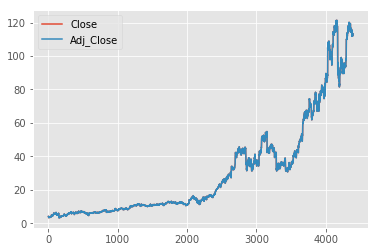

In [ ]:
# Plot Close and Adj_Close. They are exactly the same. 
hist.plot(y=['Close','Adj_Close'])

In [ ]:
#delete Adj_Close as it is redundant
del hist['Adj_Close']
hist.isnull().sum()

Date                0
Open                0
High                0
Low                 0
Close               0
Volume              0
DayofWeek           0
Dayofweek_Dummy0    0
Dayofweek_Dummy1    0
Dayofweek_Dummy2    0
Dayofweek_Dummy3    0
Dayofweek_Dummy4    0
dtype: int64

In [ ]:
hist.shape

(4392, 12)

Preparations for calculating technical indicators

In [ ]:
# Closing price n periods ago
def prev_closing(values):
    return values[0]
hist['Close_1D'] = hist['Close'].rolling(window=2,center=False).apply(func=prev_closing)
hist['Close_3D'] = hist['Close'].rolling(window=3,center=False).apply(func=prev_closing)
hist['Close_12D'] = hist['Close'].rolling(window=12,center=False).apply(func=prev_closing)
#hist["Close_1D"] = pd.DataFrame(hist["Close"][1:]).reset_index()["Close"]

#highest of n days period
hist['Highest_10D'] = hist['High'].rolling(window=10,center=False).max()
hist['Lowest_10D'] = hist['Low'].rolling(window=10,center=False).min()

hist.head(20)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you 

,Date,Open,High,Low,Close,Volume,DayofWeek,Dayofweek_Dummy0,Dayofweek_Dummy1,Dayofweek_Dummy2,Dayofweek_Dummy3,Dayofweek_Dummy4,Close_1D,Close_3D,Close_12D,Highest_10D,Lowest_10D
0,2000-03-27,3.812500,4.156250,3.812500,4.125000,3675600,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,2000-03-28,4.125000,4.125000,4.000000,4.015625,1077600,1,0,1,0,0,0,4.125000,NaN,NaN,NaN,NaN
2,2000-03-29,4.000000,4.031250,3.953125,4.000000,437200,2,0,0,1,0,0,4.015625,4.125000,NaN,NaN,NaN
3,2000-03-30,4.000000,4.000000,3.843750,3.843750,1883600,3,0,0,0,1,0,4.000000,4.015625,NaN,NaN,NaN
4,2000-03-31,3.734375,3.734375,3.390625,3.390625,7931600,4,0,0,0,0,1,3.843750,4.000000,NaN,NaN,NaN
5,2000-04-03,3.500000,3.703125,3.437500,3.437500,11486800,0,1,0,0,0,0,3.390625,3.843750,NaN,NaN,NaN
6,2000-04-04,3.531250,3.578125,3.093750,3.500000,13136800,1,0,1,0,0,0,3.437500,3.390625,NaN,NaN,NaN
7,2000-04-05,3.468750,3.562500,3.453125,3.484375,6349600,2,0,0,1,0,0,3.500000,3.437500,NaN,NaN,NaN
8,2000-04-06,3.500000,3.593750,3.468750,3.578125,7181200,3,0,0,0,1,0,3.484375,3.500000,NaN,NaN,NaN
9,2000-04-07,3.593750,3.812500,3.593750,3.609375,13904800,4,0,0,0,0,1,3.578125,3.484375,NaN,4.15625,3.093750


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning


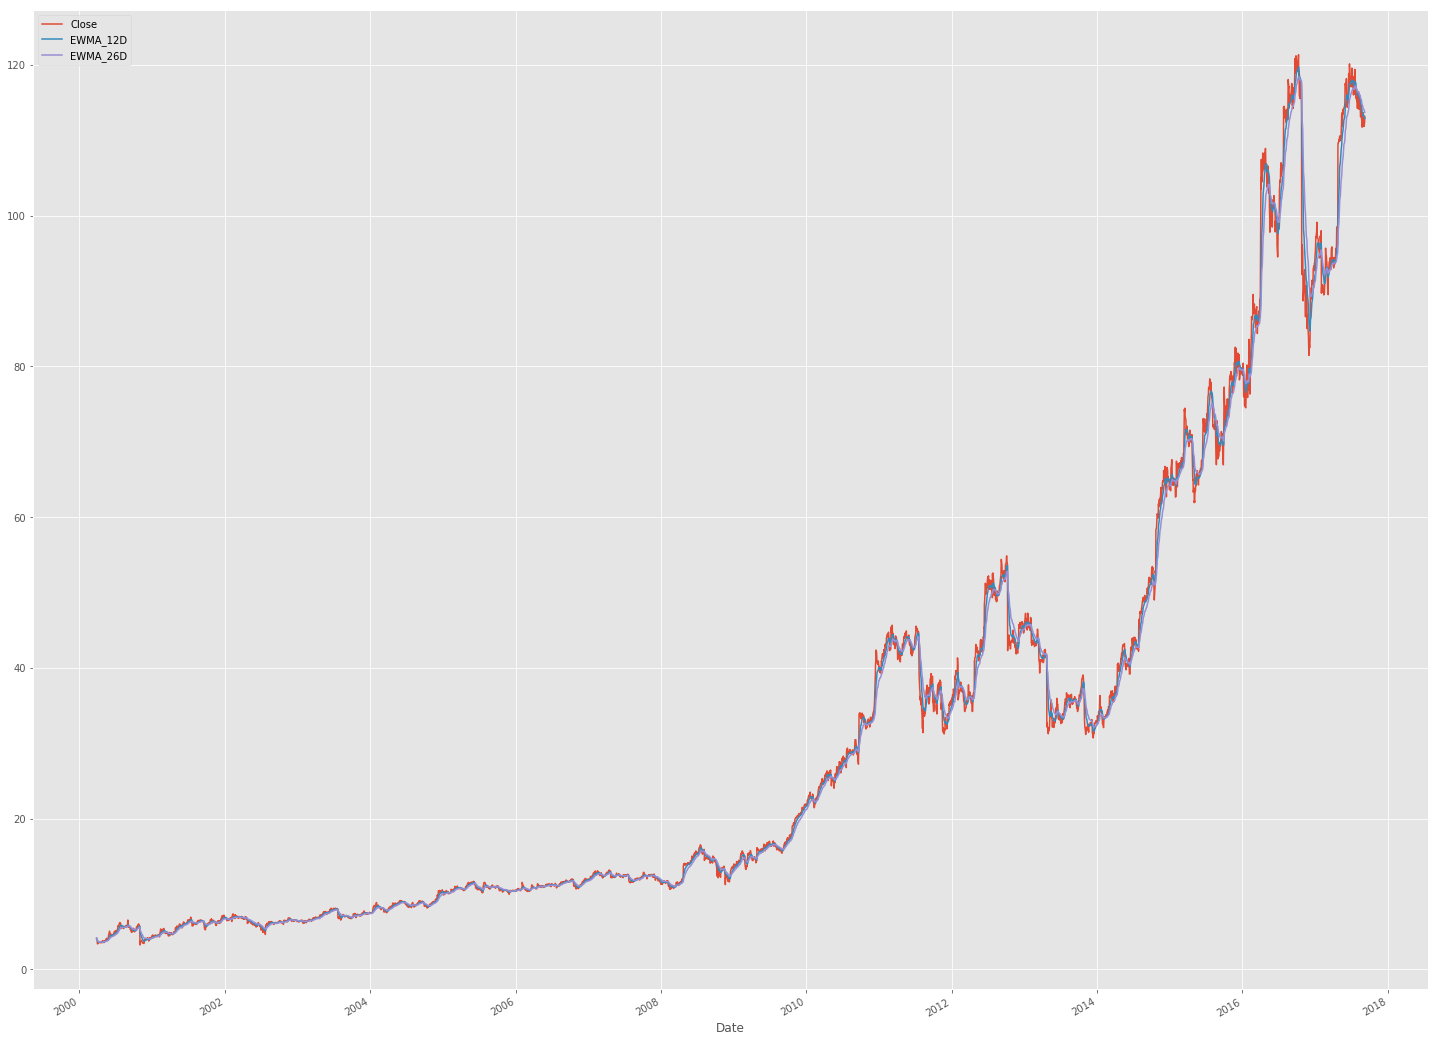

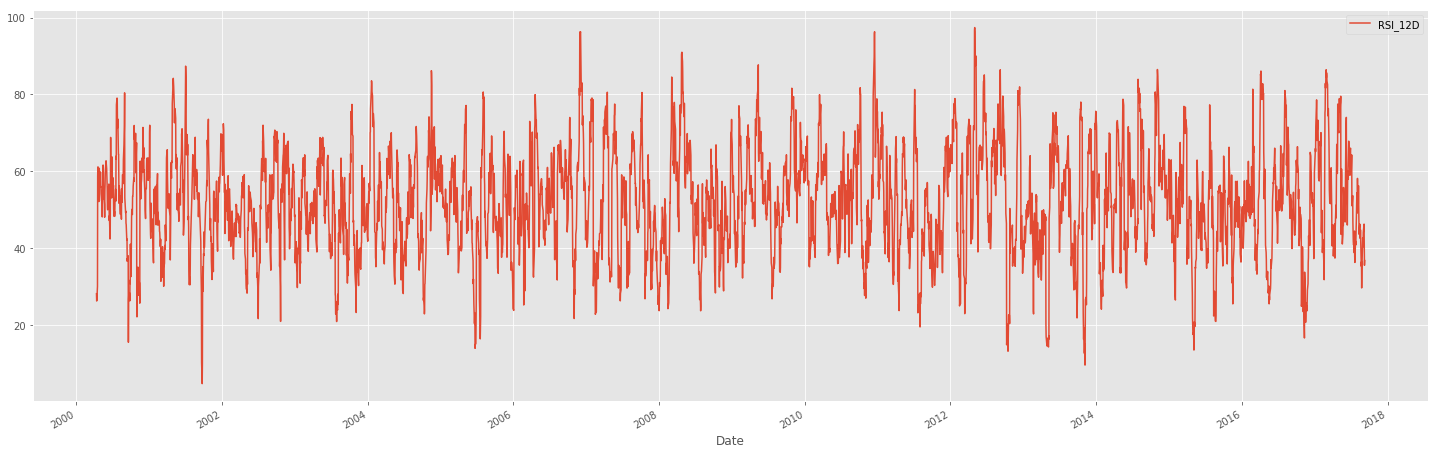

In [ ]:
# Momentum (today close - the last ith day close )
hist["Momentum_1D"] = hist["Close"] - hist["Close_1D"]
hist["Momentum_3D"] = hist["Close"] - hist["Close_3D"]

# Rate of changes n days : ROC = (Most recent closing price - Closing price n periods ago) / Closing price n periods ago x 100
hist["ROC_3D"] = ( hist["Close"] - hist["Close_3D"] ) / hist["Close_3D"] * 100
hist["ROC_12D"] = ( hist["Close"] - hist["Close_12D"] ) / hist["Close_12D"] * 100

# Williams %R:(highest-closed)/(highest-lowest)*100
#hist["Williams_10D"] = [ (hist["High"][i:i+10].max() - hist["Close"][i])/(hist["High"][i:i+9].max() - hist["Low"][i:i+10].min()) for i in range(hist.shape[0])]
hist['Williams_10D'] = hist.apply(lambda row: 100 * (row['Highest_10D'] - row['Close']) / (row['Highest_10D'] - row['Lowest_10D']),axis=1)

# Relative Strength Index
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};
def rsi(values):
    dUp = values[values>0].mean()
    dDown = -1*values[values<0].mean()
    return 100 * dUp / (dUp + dDown)
hist['RSI_6D'] = hist['Momentum_1D'].rolling(center=False,window=6).apply(rsi)
hist['RSI_12D'] = hist['Momentum_1D'].rolling(center=False,window=12).apply(rsi)

# Simple Moving Average : SUM(Close[i],N) / N
#hist["SMA_5D"] = [(hist["Close"][i:i+5]).mean() for i in range(hist.shape[0])]
hist['SMA_5D'] = hist['Close'].rolling(center=False,window=5).mean()
hist['SMA_10D'] = hist['Close'].rolling(center=False,window=10).mean()
hist['SMA_20D'] = hist['Close'].rolling(center=False,window=20).mean()
hist['SMA_30D'] = hist['Close'].rolling(center=False,window=30).mean()
hist['SMA_50D'] = hist['Close'].rolling(center=False,window=50).mean()

#EWMA 
hist['EWMA_12D'] = hist['Close'].ewm(span=12).mean()#pd.ewma(arg=hist['Close'],span=12)
hist['EWMA_26D'] = hist['Close'].ewm(span=26).mean()#pd.ewma(arg=hist['Close'],span=26)

#MACD 
hist['MACD'] = hist['EWMA_12D'] - hist['EWMA_26D']

hist.plot(x= 'Date',y=['Close','EWMA_12D','EWMA_26D'],figsize=(25,20))
hist.plot(x= 'Date',y=['RSI_12D',],figsize=(25,8))

In [ ]:
# Target: Momentum_3D VS 0
def target(values):
    if(values[-1] - values[0]>0):
        return 1
    else:
        return -1
#hist['Target'] = hist['Close'].rolling(center=False,window=4).apply(target)
hist['For_target'] = [hist["Close"][i+4] - hist["Close"][i] if i+4 < hist.shape[0] else 0 for i,record in hist.iterrows()]
hist["Target"] = [1 if i+4 < hist.shape[0] and hist["Close"][i+4] - hist["Close"][i] > 0 else -1 for i,record in hist.iterrows()]

In [ ]:
# fill NaN
#hist = hist.fillna(0)
hist.head(10)

,Date,Open,High,Low,Close,Volume,DayofWeek,Dayofweek_Dummy0,Dayofweek_Dummy1,Dayofweek_Dummy2,Dayofweek_Dummy3,Dayofweek_Dummy4,Close_1D,Close_3D,Close_12D,Highest_10D,Lowest_10D,Momentum_1D,Momentum_3D,ROC_3D,ROC_12D,Williams_10D,RSI_6D,RSI_12D,SMA_5D,SMA_10D,SMA_20D,SMA_30D,SMA_50D,EWMA_12D,EWMA_26D,MACD,For_target,Target
0,2000-03-27,3.812500,4.156250,3.812500,4.125000,3675600,0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.125000,4.125000,0.000000,-0.734375,-1
1,2000-03-28,4.125000,4.125000,4.000000,4.015625,1077600,1,0,1,0,0,0,4.125000,NaN,NaN,NaN,NaN,-0.109375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.065755,4.068209,-0.002454,-0.578125,-1
2,2000-03-29,4.000000,4.031250,3.953125,4.000000,437200,2,0,0,1,0,0,4.015625,4.125000,NaN,NaN,NaN,-0.015625,-0.125000,-3.030303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.040091,4.043702,-0.003611,-0.500000,-1
3,2000-03-30,4.000000,4.000000,3.843750,3.843750,1883600,3,0,0,0,1,0,4.000000,4.015625,NaN,NaN,NaN,-0.156250,-0.171875,-4.280156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.978114,3.987804,-0.009691,-0.359375,-1
4,2000-03-31,3.734375,3.734375,3.390625,3.390625,7931600,4,0,0,0,0,1,3.843750,4.000000,NaN,NaN,NaN,-0.453125,-0.609375,-15.234375,NaN,NaN,NaN,NaN,3.875000,NaN,NaN,NaN,NaN,3.818495,3.849316,-0.030821,0.187500,1
5,2000-04-03,3.500000,3.703125,3.437500,3.437500,11486800,0,1,0,0,0,0,3.390625,3.843750,NaN,NaN,NaN,0.046875,-0.406250,-10.569106,NaN,NaN,NaN,NaN,3.737500,NaN,NaN,NaN,NaN,3.725893,3.766833,-0.040939,0.171875,1
6,2000-04-04,3.531250,3.578125,3.093750,3.500000,13136800,1,0,1,0,0,0,3.437500,3.390625,NaN,NaN,NaN,0.062500,0.109375,3.225806,NaN,NaN,22.950820,NaN,3.634375,NaN,NaN,NaN,NaN,3.675486,3.719378,-0.043892,0.140625,1
7,2000-04-05,3.468750,3.562500,3.453125,3.484375,6349600,2,0,0,1,0,0,3.500000,3.437500,NaN,NaN,NaN,-0.015625,0.046875,1.363636,NaN,NaN,25.454545,NaN,3.531250,NaN,NaN,NaN,NaN,3.635604,3.681513,-0.045909,0.093750,1
8,2000-04-06,3.500000,3.593750,3.468750,3.578125,7181200,3,0,0,0,1,0,3.484375,3.500000,NaN,NaN,NaN,0.093750,0.078125,2.232143,NaN,NaN,24.528302,NaN,3.478125,NaN,NaN,NaN,NaN,3.624233,3.666189,-0.041956,0.000000,-1
9,2000-04-07,3.593750,3.812500,3.593750,3.609375,13904800,4,0,0,0,0,1,3.578125,3.484375,NaN,4.15625,3.09375,0.031250,0.125000,3.587444,NaN,51.470588,20.000000,NaN,3.521875,3.698437,NaN,NaN,NaN,3.621417,3.658349,-0.036932,0.003900,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92a0116be0>,
      dtype=object)

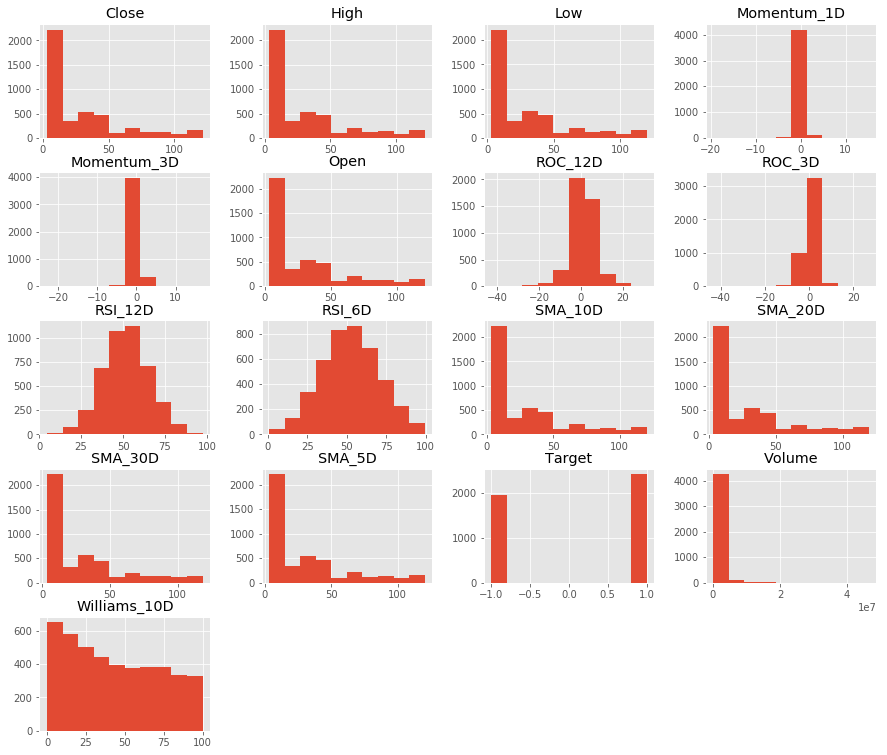

In [ ]:
# Histograms
hist[["Close","High","Low","Open","Volume","Momentum_1D","Momentum_3D","ROC_3D","ROC_12D","Williams_10D","RSI_6D","RSI_12D","SMA_5D","SMA_10D","SMA_20D","SMA_30D","Target"]].hist(figsize=(15,13))

In [ ]:
names = ["Close","Volume","Momentum_1D","Momentum_3D","ROC_3D","ROC_12D","Williams_10D","RSI_12D","SMA_30D","Target"]
corr = hist[names].corr()

[Text(0, 0, 'Close'),
 Text(0, 0, 'Volume'),
 Text(0, 0, 'Momentum_1D'),
 Text(0, 0, 'Momentum_3D'),
 Text(0, 0, 'ROC_3D'),
 Text(0, 0, 'ROC_12D'),
 Text(0, 0, 'Williams_10D'),
 Text(0, 0, 'RSI_12D'),
 Text(0, 0, 'SMA_30D')]

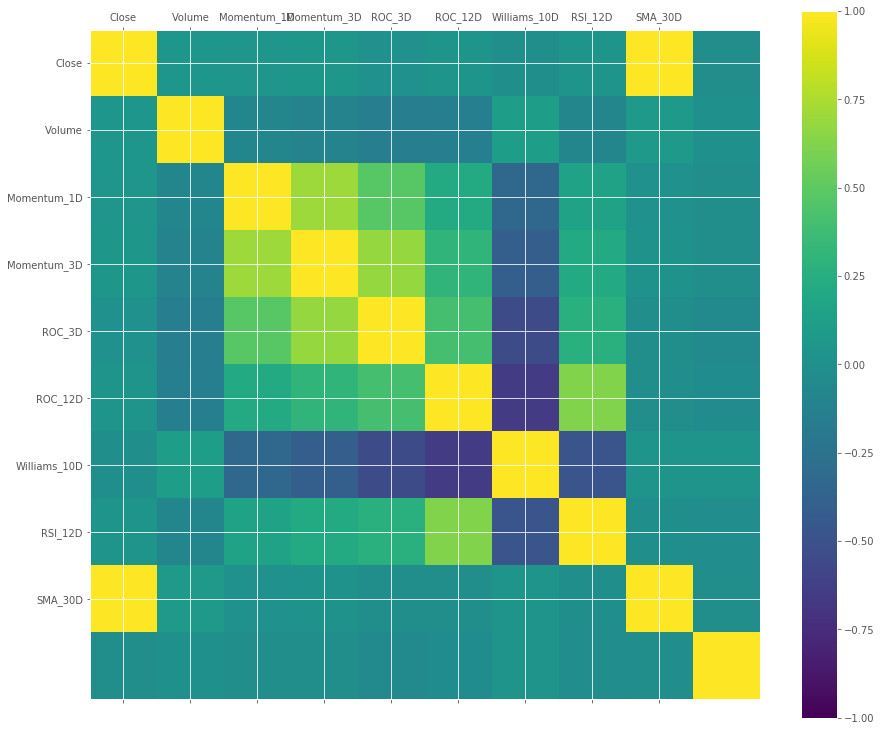

In [ ]:
# Correlation Matrix Plot
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

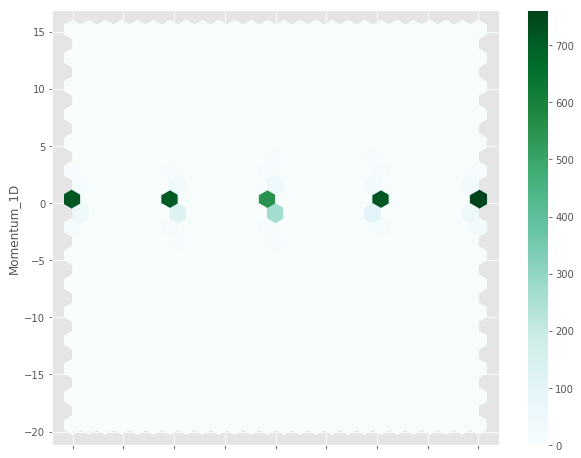

In [ ]:
from pandas.tools.plotting import scatter_matrix
#scatter_matrix(hist[['DayofWeek','Momentum_1D']],figsize=(15,13))
hist[['DayofWeek','Momentum_1D']].plot.hexbin(x='DayofWeek',y='Momentum_1D',gridsize=25,figsize=(10,8))

/opt/conda/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


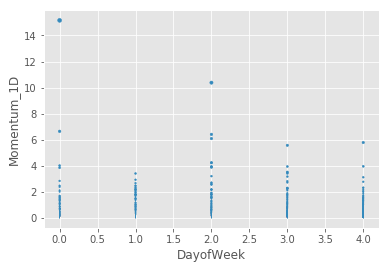

In [ ]:
hist.plot.scatter(x='DayofWeek', y='Momentum_1D', s=hist['Momentum_1D']);